# Best movie Category based on Rating and Number of votes

## Introduction
In this Index you will find why is important to look at the movies categories with the best rating and the most votes
## Why is this data relevant?
* Is important because depends in how much rating and number of votes you can see wich category is more succesful
* With this we can assume wich category is most relevant on these days


![oscar.gif](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExYzQ5MjkxZjg5NjM3NjBiYjE1ZjQ4ZjA4NmFmOTM4NmYyYTljYTE3YyZjdD1n/V1fKEA5ojhDxiB7j9T/giphy.gif)

# Code SQL

In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
conn = sqlite3.connect('data/im.db')

Here we can see the *average rating* of the *category* with the highest *number of votes*.

The main reason to filter this way is to show that not always the best rated categories are the one who have more votes

In [13]:
# pd.read_sql("""
# SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
#   FROM movie_basics
#   INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
#   WHERE movie_ratings.numvotes >= 700000 AND movie_ratings.averagerating >= 8.1
#   GROUP BY movie_basics.genres 
#   ORDER BY Rating  DESC 
#   ;
# """, conn)
pd.read_sql("""
SELECT primary_title,genres
  FROM movie_basics
  WHERE primary_title LIKE '%Black Panther%'
  ;
""", conn)

,primary_title,genres
0,The Black Panther,Drama
1,Black Panther,"Action,Adventure,Sci-Fi"
2,Merritt College: Home of the Black Panthers,"Biography,Documentary,History"
3,Black Panther Woman,"Biography,Documentary,History"
4,The Black Panthers: Vanguard of the Revolution,"Documentary,History"
5,Legacy Spirit of the Black Panthers,Documentary


# Graphic with Matplotib

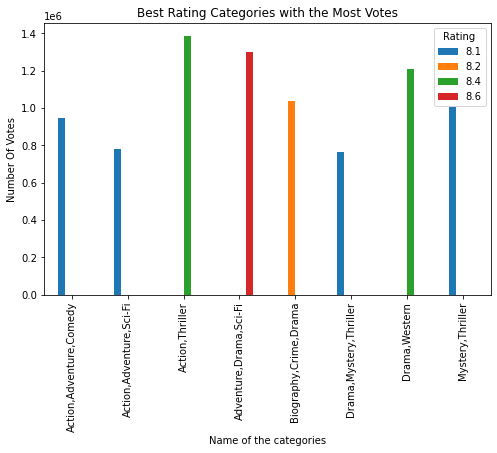

In [14]:
q= """
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 700000 AND movie_ratings.averagerating >= 8.1
  GROUP BY movie_basics.genres 
  ORDER BY Rating  DESC
;
"""
df=pd.read_sql(q, conn)
df.pivot(index='Category',columns='Rating',values='NumberVotes').plot(kind='bar',figsize=(8,5))
plt.xlabel('Name of the categories')
plt.ylabel('Number Of Votes')
plt.title('Best Rating Categories with the Most Votes')
plt.show()


# Graphic with Seaborn

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Adventure,Drama,Sci-Fi'),
  Text(1, 0, 'Drama,Western'),
  Text(2, 0, 'Action,Thriller'),
  Text(3, 0, 'Biography,Crime,Drama'),
  Text(4, 0, 'Mystery,Thriller'),
  Text(5, 0, 'Drama,Mystery,Thriller'),
  Text(6, 0, 'Action,Adventure,Sci-Fi'),
  Text(7, 0, 'Action,Adventure,Comedy')])

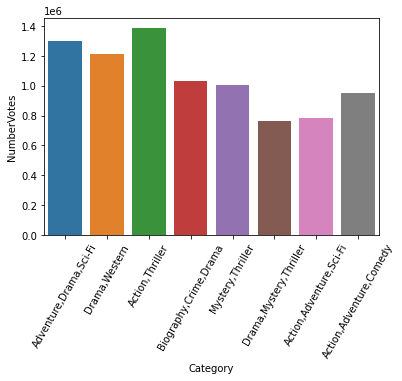

In [15]:
sns.barplot(data=df, x="Category", y="NumberVotes")
plt.xticks(rotation=60)

<AxesSubplot:xlabel='Rating', ylabel='Category'>

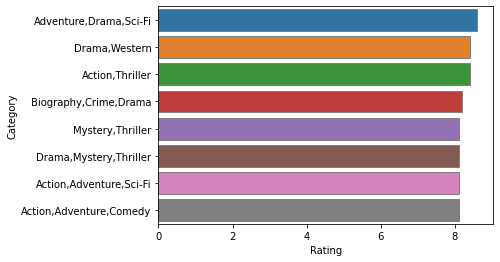

In [16]:
sns.barplot(
    data=df, x="Rating", y="Category", capsize=.4, errcolor=".5",
    linewidth=1, edgecolor=".5"
)

# Explanation

## Graphics Explanation
* The first one is about the average votes each category have, but what this mean? Well this mean that for every category the sume of each movie are the total votes per category and we can see that the category with the most votes are Action,Thriller.
* The second one is about the rating per category as we can se the best rating category is Action,Adventura,Sci-Fi.

In [22]:
df4=pd.read_sql("""
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 900000 AND movie_ratings.averagerating >= 8.1
""", conn)
df4

,Category,Rating
0,"Mystery,Thriller",8.1
1,"Action,Thriller",8.4
2,"Adventure,Drama,Sci-Fi",8.6
3,"Action,Adventure,Comedy",8.1
4,"Drama,Western",8.4
5,"Biography,Crime,Drama",8.2
6,"Action,Adventure,Sci-Fi",8.1
7,"Action,Adventure,Sci-Fi",8.8


In [25]:
genres_cols = df4['Category'].str.split(',',expand=True)
genres_cols.columns = ['genre1','genre2','genre3']
counts1=genres_cols['genre1'].value_counts()
counts2=genres_cols['genre2'].value_counts()
counts3=genres_cols['genre3'].value_counts()
total_counts = counts1.add(counts2, fill_value=0).add(counts3, fill_value=0)
one_category = total_counts.sort_values(ascending=False)
one_category.index
dfone=pd.DataFrame(list(zip(one_category.values, one_category.index)), columns = ["Frecuency", "Category"])
dfone.head(5)

,Frecuency,Category
0,4.0,Adventure
1,4.0,Action
2,3.0,Sci-Fi
3,3.0,Drama
4,2.0,Thriller


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Sci-Fi'),
  Text(3, 0, 'Drama'),
  Text(4, 0, 'Thriller'),
  Text(5, 0, 'Western'),
  Text(6, 0, 'Mystery'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Comedy'),
  Text(9, 0, 'Biography')])

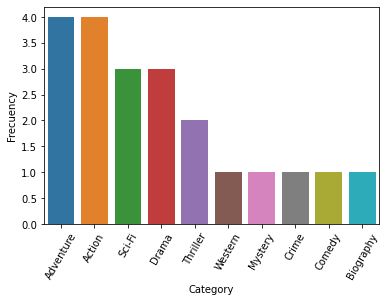

In [20]:
sns.barplot(data=dfone, x="Category", y="Frecuency")
plt.xticks(rotation=60)

# Summary/Recommendation
* The best rating category probably wont be the one with the most votes. We think the category that could have more impact will be Action,Thriller because have the most votes.

# Extra activities


# Working with my team-mate Miguel Cruz

I just helped my team-mate Miguel Cruz in the part of the query and the part of making his graphic of the query
Code of the graphic:
df=pd.read_sql(Director, conn)
df.pivot(index='primary_title',columns='averagerating',values='averagerating').plot(kind='bar',figsize=(15,8))
plt.figure(figsize=(15,8))
plt.bar('primary_title', 'averagerating',data=df)
plt.xlabel("Movie Title", size=15)
plt.ylabel('Average Rating', size=15)
plt.title("Director's movies", size=15)
plt.show()

In [ ]:
pd.read_sql("""
SELECT directors.person_id AS DirectorName,directors.movie_id AS IDM,movie_basics.movie_id,movie_basics.primary_title AS namemovie 
  FROM directors
  INNER JOIN movie_basics ON directors.movie_id = movie_basics.movie_id
  WHERE directors.person_id ='nm0751577'
  GROUP BY namemovie

  ;
""", conn)

In [ ]:
pd.read_sql("""
SELECT *
  FROM movie_basics
  WHERE primary_title = "Cherry"

  ;
""", conn)

In [ ]:
pd.read_sql("""
SELECT *
  FROM movie_ratings
  WHERE movie_id = 'tt9130508'
  ;
""", conn)

In [ ]:
avg_rating = """
SELECT person_id , primary_name as Director , COUNT(DISTINCT directors.movie_id) as "MoviesMade",  sum(movie_ratings.averagerating) / COUNT(movie_ratings.averagerating) as "Average Rating"
, movie_ratings.numvotes as numvotes
FROM persons
JOIN directors 
  USING (person_id)
JOIN movie_basics
  USING (movie_id)
JOIN movie_ratings
  USING (movie_id)
GROUP BY person_id 
HAVING "Movies Made" >= 5 AND "Average Rating" >= 8 AND numvotes >= 20000
ORDER BY "Average Rating" DESC

;
"""
pd.read_sql(avg_rating, conn)



# Working with a person outside of our team, I helped Juan Varguez 

The main activity making his query and how he can solved the problem
of the query he was assigned to. The query only requires extra information like the use of the WHERE LIKE %example
Also just helped with problems on the Kernel that only was to activate the learn-env